# Predicting Churn Bank Customer using ANN

In [25]:
#Churn model for a bank customerusing ANN model
#Read the Dataset and Preprocessing
#Task is to predict whether the customer stays or not

In [26]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
#Importing the Dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
#Create feature set and target set
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [29]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
#Categorical Encoding using dummies
geography = pd.get_dummies(x["Geography"], drop_first = True, dtype = int)
geography
gender = pd.get_dummies(x['Gender'], drop_first = True, dtype = int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [31]:
#Concatenate the Data Frames
x = pd.concat([x,geography,gender],axis = 1)
#Drop Unnecessary columns
x = x.drop(['Geography','Gender'],axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [32]:
#df.isnull().sum() ---- none found

In [33]:
!pip install sklearn
!pip install scikit-learn

In [34]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
8856,774,26,5,0.00,2,1,1,64716.08,0,0,0
1545,602,42,6,158414.85,1,1,1,131886.46,1,0,0
8136,716,38,1,0.00,2,1,1,99661.46,0,0,0
7768,601,20,9,122446.61,2,1,0,86791.90,0,1,0
7782,585,54,8,87105.32,1,1,1,55346.14,0,0,1


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Training the Model

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
#Initializing the ANN
classifier = Sequential()

In [40]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

In [41]:
#Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid' ))

In [42]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
#Fittin the ANN to the training set
model_history = classifier.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 10)

Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 0.6640 - accuracy: 0.6753 - val_loss: 0.5732 - val_accuracy: 0.7728
Epoch 2/10
536/536 [==============================] - 1s 1ms/step - loss: 0.5588 - accuracy: 0.7729 - val_loss: 0.5286 - val_accuracy: 0.7944
Epoch 3/10
536/536 [==============================] - 1s 1ms/step - loss: 0.5246 - accuracy: 0.7895 - val_loss: 0.5050 - val_accuracy: 0.8020
Epoch 4/10
536/536 [==============================] - 1s 973us/step - loss: 0.5050 - accuracy: 0.7886 - val_loss: 0.4908 - val_accuracy: 0.8008
Epoch 5/10
536/536 [==============================] - 1s 921us/step - loss: 0.4933 - accuracy: 0.7890 - val_loss: 0.4818 - val_accuracy: 0.8005
Epoch 6/10
536/536 [==============================] - 1s 1ms/step - loss: 0.4852 - accuracy: 0.7886 - val_loss: 0.4737 - val_accuracy: 0.8005
Epoch 7/10
536/536 [==============================] - 1s 1ms/step - loss: 0.4786 - accuracy: 0.7880 - val_loss: 0.4676 - val_accuracy: 0.8005
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


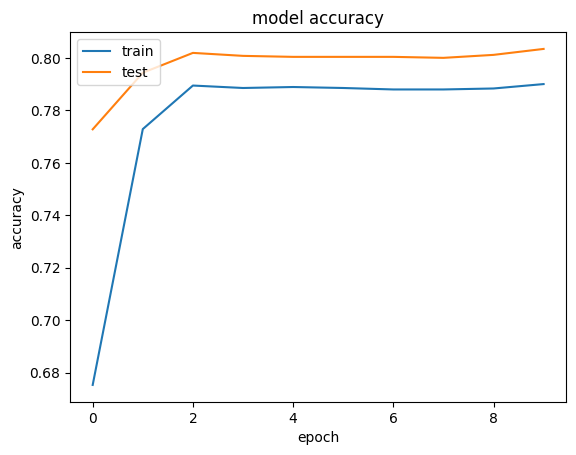

In [44]:
#list all data in history
print(model_history.history.keys())
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

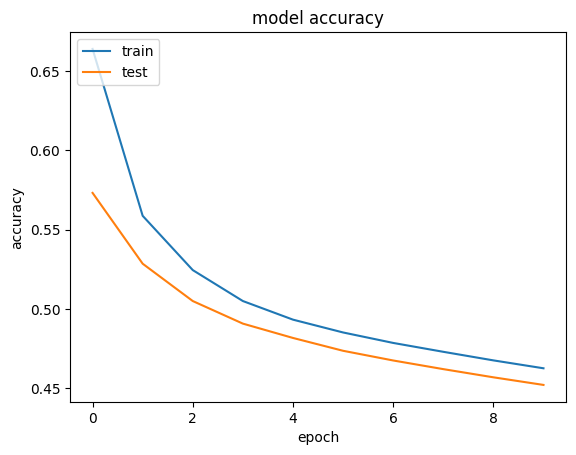

In [45]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [46]:
#Making the predictions and evaluating the model
#Predicting the Test set result
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 588us/step
